# Laporan Proyek Machine Learning - [Haekal Hasan Thanvindra]

## **Project Overview**

**Latar Belakang**

Board game merupakan bentuk hiburan yang telah ada selama ribuan tahun dan terus berkembang hingga kini. Di era modern, board game tidak hanya menjadi sarana rekreasi, tetapi juga media edukasi dan sosial yang populer di kalangan berbagai usia. Menurut data dari [BoardGameGeek](https://boardgamegeek.com/) (BGG), terdapat lebih dari 19.000 board game yang telah dirilis dan diulas oleh komunitas pengguna secara global.

Namun, dengan jumlah board game yang begitu banyak dan beragam — baik dari segi tema, mekanik permainan, tingkat kompleksitas, hingga jumlah pemain — pengguna sering kali kesulitan menemukan game yang sesuai dengan preferensi mereka. Hal ini terutama dirasakan oleh pemain baru atau pengguna yang ingin menjelajahi genre baru namun tidak memiliki referensi yang memadai.

Dengan memanfaatkan pendekatan sistem rekomendasi, kita dapat membantu pengguna menemukan board game yang relevan dengan minat mereka. Sistem ini dapat bekerja berdasarkan konten game (seperti genre dan mekanik permainan) atau berdasarkan pola kesukaan pengguna lain yang serupa.

**Kenapa Masalah Ini Harus Diselesaikan**

Membangun sistem rekomendasi board game dapat memberikan berbagai manfaat seperti:

* Membantu pengguna menemukan game yang sesuai preferensi tanpa harus menelusuri ribuan pilihan secara manual.
* Meningkatkan pengalaman pengguna, terutama bagi pemula yang masih mencari tahu game apa yang cocok untuk mereka.
* Memberikan nilai tambah bagi platform katalog game seperti BGG, toko board game online, atau aplikasi komunitas gamer.

Dengan meningkatnya tren personalisasi dan data-driven decision making, sistem rekomendasi menjadi solusi yang relevan dan aplikatif dalam membantu pengguna bernavigasi di tengah banyaknya pilihan board game yang tersedia.

**Referensi Pendukung**

* A. Fanca, A. Puscasiu, D. -I. Gota and H. Valean, "Recommendation Systems with Machine Learning," 2020 21th International Carpathian Control Conference (ICCC), High Tatras, Slovakia, 2020, pp. 1-6, doi: 10.1109/ICCC49264.2020.9257290. [Link](https://ieeexplore.ieee.org/document/9257290)

## Business Understanding

**Problem Statements**

* Bagaimana cara merekomendasikan board game yang sesuai dengan preferensi pengguna berdasarkan data atribut game seperti `Mechanics` dan `Domains`?

**Goals**

* Membangun sistem rekomendasi board game dengan pendekatan **Content-Based Filtering**
* Mengevaluasi performa sistem rekomendasi untuk memastikan rekomendasi yang dihasilkan relevan.

**Solution Statements**

* Menggunakan Content-Based Filtering dengan memanfaatkan atribut seperti `Mechanics` dan `Domains` untuk mengukur kemiripan antar board game.
* Melakukan evaluasi terhadap hasil rekomendasi menggunakan metrik Precision\@K berdasarkan kesamaan konten.

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah **Board Games Dataset** yang diperoleh dari platform Kaggle. Dataset ini berisi informasi tentang ribuan board game yang diambil dari situs BoardGameGeek, dengan total lebih dari 19.000 data game yang telah diberi peringkat oleh komunitas pengguna. Dataset dapat diakses melalui tautan berikut: [Board Games Dataset](https://www.kaggle.com/datasets/melissamonfared/board-games)

**Variabel-variabel pada dataset ini adalah sebagai berikut:**

* **Board\_Game\_ID**: ID unik untuk setiap board game.
* **Name**: Nama dari board game.
* **Year\_Published**: Tahun pertama kali game tersebut dirilis.
* **Minimum\_Number\_of\_Players**: Jumlah pemain minimum yang direkomendasikan.
* **Maximum\_Number\_of\_Players**: Jumlah pemain maksimum yang dapat bermain.
* **Playing\_Time**: Estimasi waktu rata-rata bermain (dalam menit).
* **Recommended\_Minimum\_Age**: Usia minimum pemain yang direkomendasikan.
* **Number\_of\_User\_Ratings**: Jumlah total user yang telah memberikan rating terhadap game.
* **Average\_Rating**: Rata-rata nilai rating dari para pengguna.
* **BGG\_Rank**: Ranking board game berdasarkan komunitas BoardGameGeek.
* **Average\_Complexity**: Nilai rata-rata kompleksitas (semakin tinggi menunjukkan permainan yang lebih kompleks).
* **Number\_of\_BGG\_Registered\_Owners**: Jumlah pengguna yang mengaku memiliki board game tersebut.
* **Mechanics**: Mekanisme permainan yang digunakan dalam game (misalnya: dice rolling, area control).
* **Domains**: Kategori game berdasarkan jenis atau tema (misalnya: strategy, party, thematic).

### Memuat Dataset Board Game
Pada tahap ini, dataset board game dimuat ke dalam notebook untuk dianalisis dan diproses lebih lanjut.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [2]:
# Load Dataset
df = pd.read_csv('/content/board_games.csv', encoding='latin1')

### Eksplorasi Data
Tahap ini bertujuan untuk memahami karakteristik dasar dari dataset. Misalnya, kita akan melihat distribusi rating, popularitas game, dan jumlah unik mechanics dan domain yang tersedia.
Tahap ini juga akan melakukan pengecekan dengan:
* Menampilkan 5 baris pertama untuk melihat data
* Info data: jumlah baris, kolom, tipe data tiap kolom, dan jumlah non-null
* Statistik deskriptif fitur numerik
* Cek missing values per kolom
* Visualisasi distribusi Average Rating
* menghitung korelasi fitur numerik dan membuat heatmap
* Visualisasi jumlah Board Games berdasarkan tahun terbit

In [3]:
print("5 data teratas:")
print(df.head())

5 data teratas:
         ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        480       14        13468            8.70         5   

   Complexity Average  Owned Users  \
0       

In [4]:
print("\nInfo dataset:")
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB
None


In [5]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
                  ID  Year Published   Min Players   Max Players  \
count   20327.000000    20342.000000  20343.000000  20343.000000   
mean   108216.245142     1984.249877      2.019712      5.672221   
std     98682.097298      214.003181      0.690366     15.231376   
min         1.000000    -3500.000000      0.000000      0.000000   
25%     11029.000000     2001.000000      2.000000      4.000000   
50%     88931.000000     2011.000000      2.000000      4.000000   
75%    192939.500000     2016.000000      2.000000      6.000000   
max    331787.000000     2022.000000     10.000000    999.000000   

          Play Time       Min Age    Users Rated  Rating Average  \
count  20343.000000  20343.000000   20343.000000    20343.000000   
mean      91.294548      9.601485     840.971391        6.403227   
std      545.447203      3.645458    3511.562220        0.935911   
min        0.000000      0.000000      30.000000        1.050000   
25%       30.000000     

In [6]:
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64


**Insight**:

* Total data: 20.343 baris dengan 14 fitur utama.
* Tahun terbit rata-rata: 1984, dengan beberapa nilai ekstrem (misal -3500).
* Jumlah pemain: Min rata-rata 2, Max rata-rata 5 (ada outlier 999 yang mungkin berarti tidak ada batas maksimal pemainnya).
* Durasi bermain rata-rata: 91 menit
* Outlier pada fitur *Play Time* (60.000 menit) berasal dari game **"The Campaign for North Africa"**, yang memang dirancang untuk dimainkan selama **berbulan-bulan**. Ini bukan kesalahan data, tapi representasi akurat dari game tersebut. [Referensi BGG](https://boardgamegeek.com/boardgame/4815/the-campaign-for-north-africa-the-desert-war-1940)
* Rating rata-rata game: 6.4 dengan kompleksitas rata-rata 2.
* Missing values signifikan pada fitur *Mechanics* (1.598) dan *Domains* (10.159).
* Contoh game populer: *Gloomhaven* (rating 8.79, durasi 120 menit, kompleksitas 3.86).


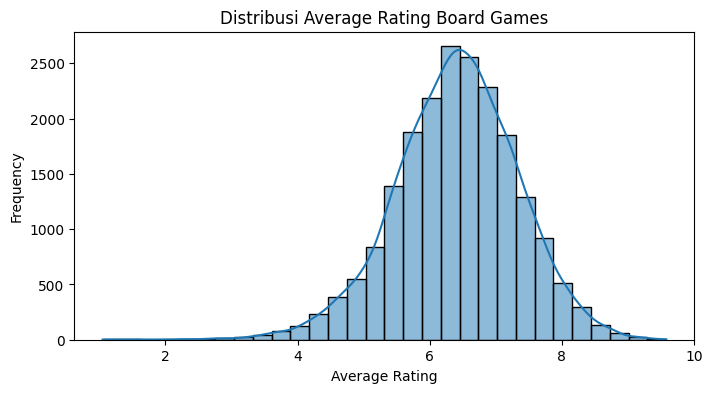

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['Rating Average'], bins=30, kde=True)
plt.title('Distribusi Average Rating Board Games')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

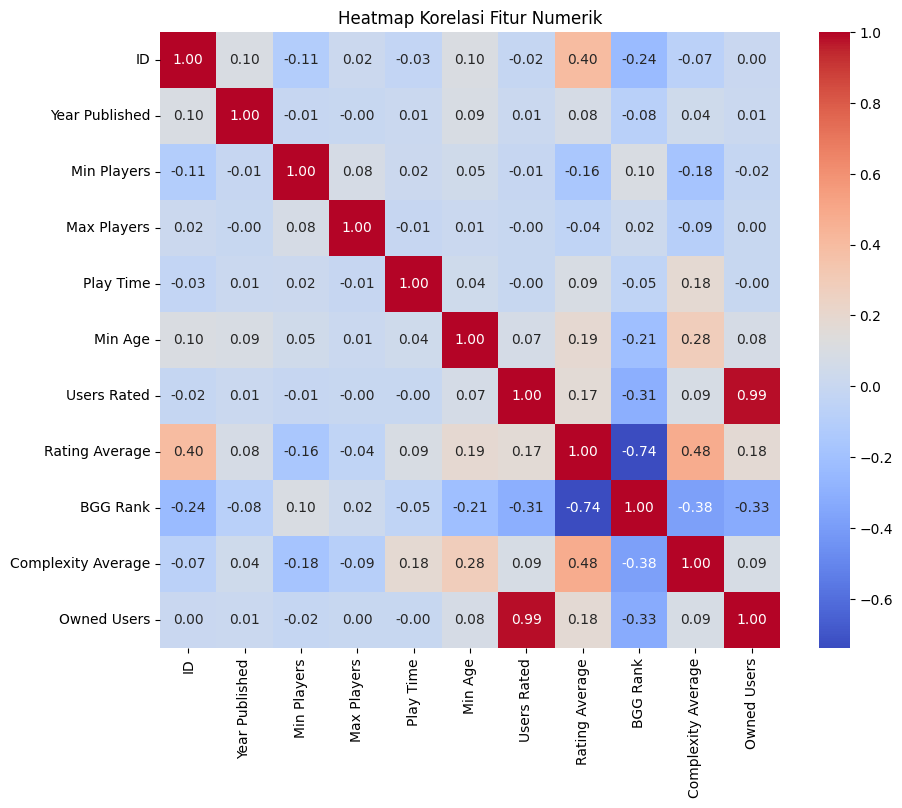

In [8]:
numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numerical_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

<ipython-input-9-db3114464ddb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year Published', data=df, palette='viridis', order=df['Year Published'].value_counts().index[:20])


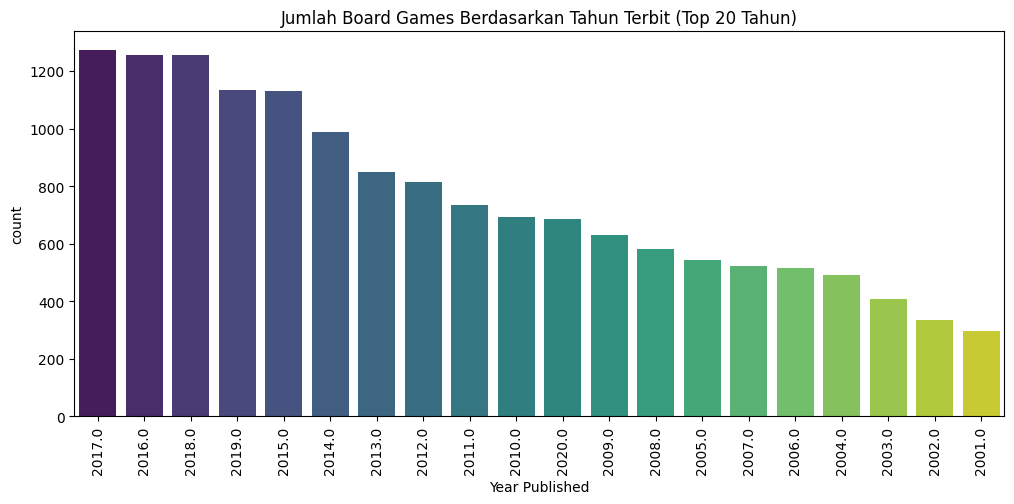

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='Year Published', data=df, palette='viridis', order=df['Year Published'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Jumlah Board Games Berdasarkan Tahun Terbit (Top 20 Tahun)')
plt.show()

**Insight**:

  * Game dengan rating di bawah 4 sangat jarang.
  * Frekuensi meningkat signifikan mulai dari rating 5 hingga puncaknya di **rating 6–7**.
  * Setelah rating 8, frekuensi mulai menurun dan nyaris datar hingga rating 10.
  * Korelasi tertinggi adalah antara **Users Rated dan Owned Users** (**0.99**), artinya game yang dimiliki banyak orang cenderung mendapat lebih banyak rating.
  * Korelasi terendah adalah antara **BGG Rank dan Rating Average** (**-0.74**), artinya semakin tinggi rating suatu game, semakin rendah (lebih baik) ranking-nya di situs BGG.
  * Tahun dengan jumlah game terbanyak:
    * **>1200 game**: 2016, 2017, 2018
    * **>1000 game**: 2014, 2015, 2019
    * **>800 game**: 2010–2013, 2020
    * **>600 game**: 2003–2009
    * **>400 game**: 2001, 2002
  * Terlihat bahwa rilis board game mengalami lonjakan signifikan sejak **awal 2010-an**, menunjukkan tren pertumbuhan industri game fisik selama dekade terakhir.

## Data Preparation

Pada tahap Data Preparation, langkah-langkah yang dilakukan adalah sebagai berikut:
1. **Menghapus Data Kosong pada Kolom Kritis**
2. **Menangani Missing Values**
3. **Filter Data Berdasarkan Popularitas**
4. **Transformasi Fitur Teks**
5. **Seleksi Fitur**
6. **Menggabungkan Fitur & Transformasi TF-IDF**

#### 1. Menghapus Data Kosong pada Kolom Kritis

* **Kolom yang dihapus:**

  * `ID`: karena hanya berfungsi sebagai identifier dan memiliki nilai kosong.
  * `Year Published`: terdapat 1 nilai kosong yang dihapus untuk menghindari error saat analisis waktu.
* **Alasan:** Nilai kosong pada kolom-kolom tersebut dapat mengganggu proses analisis dan tidak memiliki nilai informasi tambahan.

In [10]:
df = df.dropna(subset=['ID', 'Year Published'])

#### 2. Menangani Missing Values

* **Kolom `Owned Users`** diisi menggunakan nilai **median** karena memiliki distribusi yang tidak normal (skewed).
* **Kolom teks `Mechanics` dan `Domains`** yang memiliki banyak nilai kosong diisi dengan string `'Unknown'`.
* **Alasan:**

  * Median lebih tahan terhadap outlier dibanding mean.
  * Pengisian `'Unknown'` memungkinkan tetap memproses fitur teks tersebut dalam model berbasis konten.

In [11]:
df['Owned Users'].fillna(df['Owned Users'].median(), inplace=True)
df['Mechanics'].fillna('unknown', inplace=True)
df['Domains'].fillna('unknown', inplace=True)

<ipython-input-11-1a4eb050e74e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Owned Users'].fillna(df['Owned Users'].median(), inplace=True)
<ipython-input-11-1a4eb050e74e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Owned Users'].fillna(df['Owned Users'].median(), inplace=True)
<ipython-input-11-1a4eb050e74e>:2: FutureWarning:

#### 3. Filter Data Berdasarkan Popularitas

* **Syarat:** Hanya board game dengan minimal **50 user ratings** yang dipertahankan.
* **Alasan:** Untuk menjaga kualitas rekomendasi dengan hanya menyertakan game yang memiliki cukup banyak interaksi pengguna.

In [12]:
df = df[df['Users Rated'] > 50]

#### 4. Transformasi Fitur Teks

* Kolom `Mechanics` dan `Domains` diproses menjadi format **list of strings** dan dinormalisasi (lowercase, hapus spasi ekstra).
* **Alasan:** Fitur ini akan digunakan sebagai dasar pembentukan *content representation* dengan metode TF-IDF atau similaritas lainnya.


In [13]:
def clean_text_to_list(text):
    if pd.isna(text) or text == 'unknown':
        return []
    return [x.strip().lower() for x in text.split(',')]

df['Mechanics'] = df['Mechanics'].apply(clean_text_to_list)
df['Domains'] = df['Domains'].apply(clean_text_to_list)

#### 5. Seleksi Fitur

* **Fitur yang dipertahankan:**

  * `Name`, `Rating Average`, `Complexity Average`, `Year Published`, `Min Players`, `Max Players`, `Play Time`, `Mechanics`, `Domains`
* **Fitur yang dihapus:**

  * `ID`, `BGG Rank`, `Users Rated`
* **Alasan:** Hanya fitur-fitur yang relevan untuk sistem rekomendasi berbasis konten yang dipertahankan.

In [14]:
selected_features = [
    'Name', 'Rating Average', 'Complexity Average', 'Year Published',
    'Min Players', 'Max Players', 'Play Time', 'Mechanics', 'Domains'
]

# Membuat DataFrame baru hanya dengan fitur yang dipilih
df_selected = df[selected_features].copy()

# Cek data hasil seleksi
df_selected.head()

,Name,Rating Average,Complexity Average,Year Published,Min Players,Max Players,Play Time,Mechanics,Domains
0,Gloomhaven,8.79,3.86,2017.0,1,4,120,"[action queue, action retrieval, campaign / ba...","[strategy games, thematic games]"
1,Pandemic Legacy: Season 1,8.61,2.84,2015.0,2,4,60,"[action points, cooperative game, hand managem...","[strategy games, thematic games]"
2,Brass: Birmingham,8.66,3.91,2018.0,2,4,120,"[hand management, income, loans, market, netwo...",[strategy games]
3,Terraforming Mars,8.43,3.24,2016.0,1,5,120,"[card drafting, drafting, end game bonuses, ha...",[strategy games]
4,Twilight Imperium: Fourth Edition,8.70,4.22,2017.0,3,6,480,"[action drafting, area majority / influence, a...","[strategy games, thematic games]"


#### 6. Menggabungkan Fitur & Transformasi TF-IDF

* Fitur `Mechanics` dan `Domains` digabungkan menjadi satu kolom baru bernama `Combined_Features`.
* Kemudian, dilakukan proses TF-IDF Vectorization untuk mengubah teks gabungan menjadi representasi numerik yang dapat digunakan untuk perhitungan similaritas.

In [15]:
df_selected['Combined_Features'] = df_selected['Mechanics'].str.join(' ') + ' ' + df_selected['Domains'].str.join(' ')

tfidf = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf.fit_transform(df_selected['Combined_Features'])

## Modeling & Result

**1. Content-Based Filtering dengan TF-IDF dan Cosine Similarity**

**Penjelasan Konsep**:
Content-Based Filtering merekomendasikan item berdasarkan kemiripan fitur kontennya. Pada kasus ini, kami memanfaatkan kolom `Mechanics` dan `Domains` yang berisi deskripsi mekanik dan tema game. Kedua kolom tersebut digabung menjadi satu teks per game, lalu diubah menjadi representasi vektor menggunakan TF-IDF Vectorizer (yang sudah dilakukan di tahap data preparation). Kemudian, kemiripan antar game dihitung menggunakan cosine similarity. Game dengan kemiripan tertinggi akan direkomendasikan.

**Parameter Penting**:
* `top_n` menentukan berapa banyak rekomendasi yang akan ditampilkan.

In [16]:
# Hitung cosine similarity antar game
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi untuk rekomendasi top-N game mirip berdasarkan index game
def recommend_games_content_based(game_index, top_n=10):
    sim_scores = list(enumerate(cosine_sim[game_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude game itu sendiri
    game_indices = [i[0] for i in sim_scores]
    return df_selected.iloc[game_indices][['Name', 'Rating Average', 'Complexity Average']]

# Contoh rekomendasi 5 game mirip untuk game index 0 (Gloomhaven)
recommend_games_content_based(0, top_n=5)

,Name,Rating Average,Complexity Average
4504,Frosthaven,7.33,3.35
5,Gloomhaven: Jaws of the Lion,8.87,3.55
1218,Dragonfire,7.28,3.22
87,The Lord of the Rings: Journeys in Middle-Earth,8.08,2.57
21,Arkham Horror: The Card Game,8.17,3.44


**Penjelasan Hasil dan Fungsi:**
Fungsi `recommend_games_content_based` menerima indeks game dan mengembalikan daftar top-N game yang paling mirip berdasarkan konten. Ini berguna untuk rekomendasi yang relevan dengan game yang sudah disukai user.

**Kelebihan dan Kekurangan**

**Content-Based Filtering**:
* Tidak membutuhkan data interaksi user, cukup fitur konten saja.
* Rekomendasi relevan dengan preferensi game yang sudah disukai user.
  - Rekomendasi kurang personal dan terbatas pada fitur yang ada.
  - Rentan pada “filter bubble” karena hanya merekomendasikan item yang mirip.

## Evaluation

1. **Precision\@K untuk ontent-Based Filtering**

**1. Evaluation: Content-Based Filtering (Precision@K)**

**Penjelasan**

Pada tahap evaluasi, digunakan metrik Precision@K untuk mengukur seberapa banyak rekomendasi yang diberikan oleh model Content-Based Filtering memiliki kemiripan fitur utama (``Mechanics dan Domains``) dengan game referensi. Precision@K menunjukkan proporsi rekomendasi yang relevan dalam daftar rekomendasi teratas sebanyak K item. Evaluasi ini membantu menilai kualitas sistem rekomendasi secara kuantitatif.

In [17]:
# Gabungkan fitur teks
df_selected['content'] = df_selected['Mechanics'].str.join(' ') + ' ' + df_selected['Domains'].str.join(' ')
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_selected['content'])

# Gunakan game referensi (misalnya: Gloomhaven)
ref_idx = 0
cos_sim = cosine_similarity(tfidf_matrix[ref_idx], tfidf_matrix).flatten()
top_indices = cos_sim.argsort()[-6:-1][::-1]  # top 5 selain dirinya

# Lihat hasil rekomendasi
df_selected.iloc[top_indices][['Name', 'Mechanics', 'Domains']]

,Name,Mechanics,Domains
4504,Frosthaven,"[action drafting, campaign / battle card drive...",[strategy games]
5,Gloomhaven: Jaws of the Lion,"[action queue, campaign / battle card driven, ...","[strategy games, thematic games]"
1218,Dragonfire,"[card drafting, cooperative game, deck bag and...","[strategy games, thematic games]"
87,The Lord of the Rings: Journeys in Middle-Earth,"[cooperative game, deck bag and pool building,...",[thematic games]
21,Arkham Horror: The Card Game,"[action points, cooperative game, deck constru...","[customizable games, thematic games]"


In [18]:
def precision_at_k_content_based(game_index, top_n=10, threshold=0.5):
    # Ambil mechanics & domains game input sebagai set
    ref_mechanics = set(df_selected.iloc[game_index]['Mechanics'])
    ref_domains = set(df_selected.iloc[game_index]['Domains'])

    # Dapatkan rekomendasi top_n game (indeks dan skor)
    sim_scores = list(enumerate(cosine_sim[game_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude game itu sendiri

    relevant_count = 0
    for idx, score in sim_scores:
        rec_mechanics = set(df_selected.iloc[idx]['Mechanics'])
        rec_domains = set(df_selected.iloc[idx]['Domains'])

        # Hitung overlap
        mechanics_overlap = len(ref_mechanics.intersection(rec_mechanics)) / (len(ref_mechanics) or 1)
        domains_overlap = len(ref_domains.intersection(rec_domains)) / (len(ref_domains) or 1)

        # Jika overlap di mechanics atau domains melebihi threshold, anggap relevan
        if mechanics_overlap >= threshold or domains_overlap >= threshold:
            relevant_count += 1

    precision = relevant_count / top_n
    return precision

# Contoh pakai
precision_cb = precision_at_k_content_based(game_index=0, top_n=5, threshold=0.5)
print(f"Precision@5 Content-Based (berdasarkan mechanics/domains): {precision_cb:.2f}")

Precision@5 Content-Based (berdasarkan mechanics/domains): 1.00


Model Content-Based Filtering menunjukkan performa yang sangat baik dengan Precision@5 sebesar 1.00, yang berarti semua rekomendasi dalam top 5 memiliki kemiripan fitur `Mechanics` dan `Domains` yang tinggi dengan game referensi. Hasil ini mengindikasikan sistem mampu secara akurat mengenali dan merekomendasikan game yang secara substansi relevan berdasarkan karakteristik utama permainan.

**Hasil Evaluasi**

Pada evaluasi sistem rekomendasi, digunakan metrik Precision@5 untuk mengukur seberapa relevan rekomendasi yang diberikan oleh Content-Based Filtering (CBF).

* **Content-Based Filtering (CBF)** memperoleh nilai Precision@5 sebesar 1.0, yang berarti semua rekomendasi yang diberikan memiliki kemiripan tinggi dari segi fitur konten (Mechanics dan Domains).

Hasil ini menunjukkan bahwa CBF memberikan rekomendasi yang sangat tepat berdasarkan kesamaan konten, khususnya dalam kondisi data interaksi pengguna yang terbatas atau tidak tersedia.

**3. Dampak terhadap Business Understanding**

* ✅ **Problem Statement Terjawab:** Sistem memberikan rekomendasi berdasarkan kesamaan konten game.
* 🎯 **Goal Tercapai:** Sistem dapat menampilkan top-N board games yang relevan dan sesuai dengan `Mechanics` dan `Domains`.
* 🧩 **Solusi Berdampak:** *Content-Based* memungkinkan rekomendasi meski tanpa data pengguna.